In [1]:
import cv2
import os
from tqdm import tqdm

In [2]:
import numpy as np
from random import shuffle
from keras.constraints import maxnorm

Using TensorFlow backend.


In [3]:
import tensorflow as tf

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [5]:
TRAIN_DIR=r'D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\mine2'
#TEST_DIR=r'D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\mine\Test'

In [6]:
IMG_SIZE=64
LR=1e-3

MODEL_NAME='safewaters-{}-{}.model'.format(LR,'2conv-basic')

In [7]:
file1 = open(r"D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\Labels\grab_1000to9999.txt","r+")
s=file1.readlines()
#print(s[0])

In [8]:
def label_img(img,j):
    label1=s[j].split('-')[0]
    label2=s[j].split('-')[1]
    img1=img.split('.')[0]
    
    if(label1==img1):
        if (label2=='knee deep\n'):
            return(1)
        elif (label2=='waist deep\n'):
            return(2)
        elif (label2=='feet'):
            return(3)
        elif (label2=='dangerously deep\n'):
            return(4)
        else:
            return(0)

In [9]:
def create_train_data():
    training_data=[]
    k=0
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img,k)
        k=k+1
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),[label]])
    shuffle(training_data)
    return training_data

In [10]:
train_data=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:35<00:00, 252.24it/s]


In [11]:
np.array(train_data).shape

(9000, 2)

In [12]:
x=[]
z=[]
for i in range(len(train_data)):
    x.append(train_data[i][0])
    z.append(train_data[i][1])

In [13]:
y=[]
for i in z:
    for j in i:
        y.append(int(j))


In [14]:
x=np.array(x)
y=np.array(y)

In [15]:
x.shape

(9000, 64, 64)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [18]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(6750, 64, 64) (6750,) (2250, 64, 64) (2250,)


In [19]:
batch_size = 128
num_classes = 1

# input image dimensions
img_rows, img_cols = 64,64

In [23]:
if K.image_data_format() == 'channels_first':
    xtrain = xtrain.reshape(xtrain.shape[0], 1, img_rows, img_cols)
    xtest = xtest.reshape(xtest.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    xtrain = xtrain.reshape(xtrain.shape[0], img_rows, img_cols, 1)
    xtest = xtest.reshape(xtest.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [24]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(6750, 64, 64, 1) (6750,) (2250, 64, 64, 1) (2250,)


In [25]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255
print('xtrain shape:', xtrain.shape)
print('ytrain shape:', ytrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

xtrain shape: (6750, 64, 64, 1)
ytrain shape: (6750,)
6750 train samples
2250 test samples


In [26]:
ytrain.shape

(6750,)

In [27]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)

In [28]:
#from keras.utils import to_categorical
#y_binary = to_categorical(y_int)
ytrain = keras.utils.to_categorical(ytrain,5)
ytest = keras.utils.to_categorical(ytest,5)

#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]

In [29]:
ytrain.shape

(6750, 5)

In [67]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.fit(xtrain, ytrain, batch_size=32, epochs=2)
#model.summary()
#model.fit(xtrain, ytrain,batch_size=128,epochs=2,verbose=1,validation_data=(xtest, ytest))

In [77]:
history=model.fit(xtrain, ytrain,epochs=10,verbose=1,validation_data=(xtest, ytest))

Train on 6750 samples, validate on 2250 samples
Epoch 1/10


6688/6750 [============================>.] - ETA: 1:39 - loss: 0.8780 - acc: 0.625 - ETA: 1:42 - loss: 0.8918 - acc: 0.593 - ETA: 1:39 - loss: 0.9588 - acc: 0.552 - ETA: 1:37 - loss: 0.9579 - acc: 0.593 - ETA: 1:36 - loss: 0.9391 - acc: 0.587 - ETA: 1:35 - loss: 0.9018 - acc: 0.604 - ETA: 1:35 - loss: 0.8668 - acc: 0.638 - ETA: 1:36 - loss: 0.8324 - acc: 0.664 - ETA: 1:35 - loss: 0.8222 - acc: 0.673 - ETA: 1:34 - loss: 0.8073 - acc: 0.684 - ETA: 1:33 - loss: 0.7865 - acc: 0.687 - ETA: 1:33 - loss: 0.8148 - acc: 0.666 - ETA: 1:32 - loss: 0.8134 - acc: 0.661 - ETA: 1:32 - loss: 0.8234 - acc: 0.654 - ETA: 1:32 - loss: 0.8578 - acc: 0.637 - ETA: 1:32 - loss: 0.8740 - acc: 0.623 - ETA: 1:32 - loss: 0.8828 - acc: 0.617 - ETA: 1:31 - loss: 0.8912 - acc: 0.609 - ETA: 1:29 - loss: 0.8872 - acc: 0.610 - ETA: 1:27 - loss: 0.8874 - acc: 0.607 - ETA: 1:26 - loss: 0.8918 - acc: 0.608 - ETA: 1:24 - loss: 0.8918 - acc: 0.609 - ETA: 1:23 - loss: 0.8955 - acc: 0.607 - ETA: 1:22 - loss: 0.8983 - acc: 0.6

6720/6750 [============================>.] - ETA: 1:43 - loss: 0.9930 - acc: 0.500 - ETA: 1:43 - loss: 0.9364 - acc: 0.578 - ETA: 1:42 - loss: 0.9163 - acc: 0.593 - ETA: 1:43 - loss: 0.8850 - acc: 0.617 - ETA: 1:41 - loss: 0.9037 - acc: 0.606 - ETA: 1:39 - loss: 0.9151 - acc: 0.599 - ETA: 1:40 - loss: 0.9039 - acc: 0.602 - ETA: 1:39 - loss: 0.9034 - acc: 0.597 - ETA: 1:38 - loss: 0.8953 - acc: 0.600 - ETA: 1:38 - loss: 0.8857 - acc: 0.606 - ETA: 1:37 - loss: 0.8569 - acc: 0.630 - ETA: 1:36 - loss: 0.8500 - acc: 0.630 - ETA: 1:35 - loss: 0.8662 - acc: 0.634 - ETA: 1:34 - loss: 0.8544 - acc: 0.638 - ETA: 1:34 - loss: 0.8646 - acc: 0.637 - ETA: 1:33 - loss: 0.8661 - acc: 0.630 - ETA: 1:33 - loss: 0.8681 - acc: 0.628 - ETA: 1:32 - loss: 0.8641 - acc: 0.631 - ETA: 1:32 - loss: 0.8653 - acc: 0.633 - ETA: 1:32 - loss: 0.8606 - acc: 0.631 - ETA: 1:32 - loss: 0.8500 - acc: 0.639 - ETA: 1:31 - loss: 0.8457 - acc: 0.642 - ETA: 1:31 - loss: 0.8510 - acc: 0.642 - ETA: 1:31 - loss: 0.8543 - acc: 0.6

6750/6750 [==============================] - 113s 17ms/step - loss: 0.8504 - acc: 0.6324 - val_loss: 0.9328 - val_acc: 0.5991
Epoch 3/10


6720/6750 [============================>.] - ETA: 1:45 - loss: 0.8495 - acc: 0.593 - ETA: 1:45 - loss: 0.8901 - acc: 0.593 - ETA: 1:45 - loss: 0.8629 - acc: 0.614 - ETA: 1:43 - loss: 0.8456 - acc: 0.625 - ETA: 1:41 - loss: 0.8737 - acc: 0.625 - ETA: 1:41 - loss: 0.8624 - acc: 0.640 - ETA: 1:42 - loss: 0.8381 - acc: 0.638 - ETA: 1:42 - loss: 0.8585 - acc: 0.617 - ETA: 1:41 - loss: 0.8576 - acc: 0.621 - ETA: 1:40 - loss: 0.8456 - acc: 0.625 - ETA: 1:40 - loss: 0.8536 - acc: 0.630 - ETA: 1:39 - loss: 0.8500 - acc: 0.630 - ETA: 1:38 - loss: 0.8609 - acc: 0.622 - ETA: 1:37 - loss: 0.8423 - acc: 0.633 - ETA: 1:36 - loss: 0.8320 - acc: 0.639 - ETA: 1:36 - loss: 0.8462 - acc: 0.638 - ETA: 1:36 - loss: 0.8465 - acc: 0.637 - ETA: 1:36 - loss: 0.8489 - acc: 0.631 - ETA: 1:36 - loss: 0.8499 - acc: 0.639 - ETA: 1:36 - loss: 0.8507 - acc: 0.632 - ETA: 1:35 - loss: 0.8504 - acc: 0.635 - ETA: 1:34 - loss: 0.8651 - acc: 0.630 - ETA: 1:33 - loss: 0.8647 - acc: 0.631 - ETA: 1:33 - loss: 0.8608 - acc: 0.6

6750/6750 [==============================] - ETA: 1:52 - loss: 0.8086 - acc: 0.750 - ETA: 1:44 - loss: 0.8000 - acc: 0.687 - ETA: 1:43 - loss: 0.8642 - acc: 0.656 - ETA: 1:43 - loss: 0.8403 - acc: 0.656 - ETA: 1:42 - loss: 0.8279 - acc: 0.662 - ETA: 1:43 - loss: 0.8266 - acc: 0.666 - ETA: 1:39 - loss: 0.8298 - acc: 0.656 - ETA: 1:36 - loss: 0.8346 - acc: 0.636 - ETA: 1:35 - loss: 0.8274 - acc: 0.645 - ETA: 1:33 - loss: 0.8163 - acc: 0.637 - ETA: 1:34 - loss: 0.8074 - acc: 0.647 - ETA: 1:33 - loss: 0.8248 - acc: 0.645 - ETA: 1:33 - loss: 0.8137 - acc: 0.649 - ETA: 1:32 - loss: 0.8111 - acc: 0.645 - ETA: 1:31 - loss: 0.8318 - acc: 0.631 - ETA: 1:31 - loss: 0.8435 - acc: 0.621 - ETA: 1:29 - loss: 0.8402 - acc: 0.623 - ETA: 1:27 - loss: 0.8383 - acc: 0.621 - ETA: 1:25 - loss: 0.8365 - acc: 0.621 - ETA: 1:23 - loss: 0.8376 - acc: 0.621 - ETA: 1:22 - loss: 0.8382 - acc: 0.623 - ETA: 1:21 - loss: 0.8335 - acc: 0.622 - ETA: 1:21 - loss: 0.8393 - acc: 0.622 - ETA: 1:20 - loss: 0.8355 - acc: 0.6

Epoch 5/10


6720/6750 [============================>.] - ETA: 1:43 - loss: 0.8724 - acc: 0.625 - ETA: 1:44 - loss: 0.7525 - acc: 0.750 - ETA: 1:44 - loss: 0.8098 - acc: 0.697 - ETA: 1:41 - loss: 0.8413 - acc: 0.664 - ETA: 1:38 - loss: 0.8216 - acc: 0.656 - ETA: 1:39 - loss: 0.7993 - acc: 0.682 - ETA: 1:37 - loss: 0.7706 - acc: 0.683 - ETA: 1:37 - loss: 0.7844 - acc: 0.671 - ETA: 1:37 - loss: 0.7648 - acc: 0.680 - ETA: 1:36 - loss: 0.7784 - acc: 0.665 - ETA: 1:35 - loss: 0.7682 - acc: 0.673 - ETA: 1:35 - loss: 0.7745 - acc: 0.679 - ETA: 1:34 - loss: 0.7757 - acc: 0.675 - ETA: 1:34 - loss: 0.7861 - acc: 0.671 - ETA: 1:34 - loss: 0.7918 - acc: 0.670 - ETA: 1:33 - loss: 0.7916 - acc: 0.675 - ETA: 1:33 - loss: 0.7915 - acc: 0.676 - ETA: 1:32 - loss: 0.7868 - acc: 0.680 - ETA: 1:32 - loss: 0.7875 - acc: 0.679 - ETA: 1:31 - loss: 0.7873 - acc: 0.676 - ETA: 1:31 - loss: 0.7847 - acc: 0.678 - ETA: 1:31 - loss: 0.7794 - acc: 0.677 - ETA: 1:31 - loss: 0.7773 - acc: 0.676 - ETA: 1:30 - loss: 0.7809 - acc: 0.6

6720/6750 [============================>.] - ETA: 1:47 - loss: 0.9676 - acc: 0.562 - ETA: 1:46 - loss: 0.8736 - acc: 0.609 - ETA: 1:41 - loss: 0.8324 - acc: 0.625 - ETA: 1:39 - loss: 0.7805 - acc: 0.664 - ETA: 1:40 - loss: 0.7520 - acc: 0.681 - ETA: 1:39 - loss: 0.7483 - acc: 0.671 - ETA: 1:38 - loss: 0.7582 - acc: 0.647 - ETA: 1:37 - loss: 0.7691 - acc: 0.644 - ETA: 1:37 - loss: 0.7791 - acc: 0.638 - ETA: 1:36 - loss: 0.7682 - acc: 0.653 - ETA: 1:35 - loss: 0.7859 - acc: 0.644 - ETA: 1:35 - loss: 0.7904 - acc: 0.648 - ETA: 1:35 - loss: 0.7894 - acc: 0.649 - ETA: 1:35 - loss: 0.7633 - acc: 0.665 - ETA: 1:34 - loss: 0.7564 - acc: 0.666 - ETA: 1:33 - loss: 0.7422 - acc: 0.675 - ETA: 1:33 - loss: 0.7375 - acc: 0.678 - ETA: 1:32 - loss: 0.7549 - acc: 0.680 - ETA: 1:32 - loss: 0.7547 - acc: 0.679 - ETA: 1:31 - loss: 0.7409 - acc: 0.687 - ETA: 1:31 - loss: 0.7418 - acc: 0.687 - ETA: 1:30 - loss: 0.7556 - acc: 0.681 - ETA: 1:30 - loss: 0.7580 - acc: 0.686 - ETA: 1:30 - loss: 0.7618 - acc: 0.6

6750/6750 [==============================] - 109s 16ms/step - loss: 0.7941 - acc: 0.6647 - val_loss: 0.9139 - val_acc: 0.6333
Epoch 7/10


6720/6750 [============================>.] - ETA: 1:36 - loss: 0.6734 - acc: 0.781 - ETA: 1:32 - loss: 0.6878 - acc: 0.703 - ETA: 1:35 - loss: 0.8163 - acc: 0.656 - ETA: 1:36 - loss: 0.8743 - acc: 0.632 - ETA: 1:34 - loss: 0.8115 - acc: 0.662 - ETA: 1:34 - loss: 0.7815 - acc: 0.666 - ETA: 1:34 - loss: 0.7520 - acc: 0.687 - ETA: 1:33 - loss: 0.7770 - acc: 0.675 - ETA: 1:33 - loss: 0.7819 - acc: 0.684 - ETA: 1:33 - loss: 0.7851 - acc: 0.678 - ETA: 1:32 - loss: 0.7943 - acc: 0.676 - ETA: 1:32 - loss: 0.7942 - acc: 0.677 - ETA: 1:31 - loss: 0.8211 - acc: 0.668 - ETA: 1:31 - loss: 0.8092 - acc: 0.676 - ETA: 1:31 - loss: 0.8141 - acc: 0.668 - ETA: 1:31 - loss: 0.8302 - acc: 0.666 - ETA: 1:31 - loss: 0.8240 - acc: 0.671 - ETA: 1:30 - loss: 0.8168 - acc: 0.673 - ETA: 1:30 - loss: 0.8229 - acc: 0.672 - ETA: 1:29 - loss: 0.8254 - acc: 0.667 - ETA: 1:29 - loss: 0.8275 - acc: 0.660 - ETA: 1:29 - loss: 0.8264 - acc: 0.659 - ETA: 1:29 - loss: 0.8340 - acc: 0.654 - ETA: 1:28 - loss: 0.8357 - acc: 0.6

6720/6750 [============================>.] - ETA: 1:52 - loss: 0.5140 - acc: 0.781 - ETA: 1:51 - loss: 0.6015 - acc: 0.734 - ETA: 1:47 - loss: 0.6923 - acc: 0.677 - ETA: 1:44 - loss: 0.7047 - acc: 0.671 - ETA: 1:43 - loss: 0.7061 - acc: 0.668 - ETA: 1:43 - loss: 0.7138 - acc: 0.682 - ETA: 1:42 - loss: 0.7082 - acc: 0.678 - ETA: 1:41 - loss: 0.7241 - acc: 0.675 - ETA: 1:41 - loss: 0.7201 - acc: 0.680 - ETA: 1:41 - loss: 0.7242 - acc: 0.681 - ETA: 1:40 - loss: 0.7250 - acc: 0.684 - ETA: 1:40 - loss: 0.7435 - acc: 0.671 - ETA: 1:40 - loss: 0.7442 - acc: 0.665 - ETA: 1:39 - loss: 0.7546 - acc: 0.660 - ETA: 1:39 - loss: 0.7576 - acc: 0.658 - ETA: 1:37 - loss: 0.7700 - acc: 0.656 - ETA: 1:37 - loss: 0.7787 - acc: 0.650 - ETA: 1:36 - loss: 0.7793 - acc: 0.649 - ETA: 1:36 - loss: 0.7766 - acc: 0.651 - ETA: 1:35 - loss: 0.7629 - acc: 0.660 - ETA: 1:34 - loss: 0.7608 - acc: 0.659 - ETA: 1:33 - loss: 0.7686 - acc: 0.652 - ETA: 1:33 - loss: 0.7637 - acc: 0.657 - ETA: 1:32 - loss: 0.7614 - acc: 0.6

6750/6750 [==============================] - 111s 16ms/step - loss: 0.7722 - acc: 0.6754 - val_loss: 0.8840 - val_acc: 0.6356
Epoch 9/10


6720/6750 [============================>.] - ETA: 1:45 - loss: 0.8127 - acc: 0.625 - ETA: 1:48 - loss: 0.7035 - acc: 0.671 - ETA: 1:44 - loss: 0.8278 - acc: 0.666 - ETA: 1:44 - loss: 0.8302 - acc: 0.687 - ETA: 1:42 - loss: 0.7997 - acc: 0.700 - ETA: 1:40 - loss: 0.7721 - acc: 0.692 - ETA: 1:40 - loss: 0.7786 - acc: 0.687 - ETA: 1:40 - loss: 0.7886 - acc: 0.683 - ETA: 1:40 - loss: 0.7615 - acc: 0.694 - ETA: 1:38 - loss: 0.7391 - acc: 0.706 - ETA: 1:36 - loss: 0.7221 - acc: 0.710 - ETA: 1:35 - loss: 0.7342 - acc: 0.703 - ETA: 1:35 - loss: 0.7325 - acc: 0.699 - ETA: 1:35 - loss: 0.7272 - acc: 0.703 - ETA: 1:34 - loss: 0.7231 - acc: 0.708 - ETA: 1:34 - loss: 0.7253 - acc: 0.707 - ETA: 1:33 - loss: 0.7339 - acc: 0.696 - ETA: 1:32 - loss: 0.7400 - acc: 0.701 - ETA: 1:31 - loss: 0.7439 - acc: 0.697 - ETA: 1:30 - loss: 0.7363 - acc: 0.701 - ETA: 1:30 - loss: 0.7367 - acc: 0.700 - ETA: 1:30 - loss: 0.7357 - acc: 0.701 - ETA: 1:30 - loss: 0.7319 - acc: 0.705 - ETA: 1:30 - loss: 0.7262 - acc: 0.7

6720/6750 [============================>.] - ETA: 1:40 - loss: 0.4732 - acc: 0.718 - ETA: 1:40 - loss: 0.6323 - acc: 0.703 - ETA: 1:42 - loss: 0.6265 - acc: 0.718 - ETA: 1:41 - loss: 0.6543 - acc: 0.671 - ETA: 1:39 - loss: 0.6864 - acc: 0.675 - ETA: 1:40 - loss: 0.6640 - acc: 0.682 - ETA: 1:39 - loss: 0.6590 - acc: 0.696 - ETA: 1:38 - loss: 0.6727 - acc: 0.699 - ETA: 1:39 - loss: 0.6732 - acc: 0.701 - ETA: 1:39 - loss: 0.6798 - acc: 0.696 - ETA: 1:38 - loss: 0.6688 - acc: 0.696 - ETA: 1:37 - loss: 0.6821 - acc: 0.700 - ETA: 1:36 - loss: 0.6723 - acc: 0.711 - ETA: 1:36 - loss: 0.6750 - acc: 0.707 - ETA: 1:36 - loss: 0.6856 - acc: 0.706 - ETA: 1:34 - loss: 0.6983 - acc: 0.699 - ETA: 1:34 - loss: 0.6856 - acc: 0.704 - ETA: 1:34 - loss: 0.6965 - acc: 0.701 - ETA: 1:34 - loss: 0.6979 - acc: 0.705 - ETA: 1:33 - loss: 0.6999 - acc: 0.704 - ETA: 1:32 - loss: 0.7078 - acc: 0.703 - ETA: 1:31 - loss: 0.7095 - acc: 0.704 - ETA: 1:31 - loss: 0.7150 - acc: 0.702 - ETA: 1:31 - loss: 0.7209 - acc: 0.6

6750/6750 [==============================] - 112s 17ms/step - loss: 0.7345 - acc: 0.6932 - val_loss: 0.8577 - val_acc: 0.6560


In [78]:
score = model.evaluate(xtest, ytest, batch_size=128)
score

2250/2250 [==============================] - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 10s 5ms/step


[0.857708368619283, 0.6560000003708734]

In [79]:
scores = model.evaluate(xtest, ytest, verbose=0)

In [80]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.60%


In [81]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [73]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [74]:
 # evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
score = loaded_model.evaluate(xtest, ytest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 59.69%


In [90]:
pred=model.predict([xtest])

In [91]:
print(np.argmax(pred[11]))

2


In [92]:
p=[]
for i in range(0,len(pred)):
    p.append(np.argmax(pred[i]))

In [93]:
print(ytest[11])

[0. 0. 0. 1. 0.]


In [94]:
ytest

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [95]:
a=[]
for i in range(0,len(ytest)):
    for j in range(0,5):
        if(ytest[i][j]==1.0):
            a.append(j)

In [96]:
len(a)

2250

In [97]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = a
predicted = p
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted) )
print('Report : ')
print(classification_report(actual, predicted) )

Confusion Matrix :
[[468 132  39  27]
 [158 318 101  21]
 [ 49 143 617  20]
 [ 25  10  49  73]]
Accuracy Score : 0.656
Report : 
              precision    recall  f1-score   support

           1       0.67      0.70      0.69       666
           2       0.53      0.53      0.53       598
           3       0.77      0.74      0.75       829
           4       0.52      0.46      0.49       157

    accuracy                           0.66      2250
   macro avg       0.62      0.61      0.61      2250
weighted avg       0.66      0.66      0.66      2250



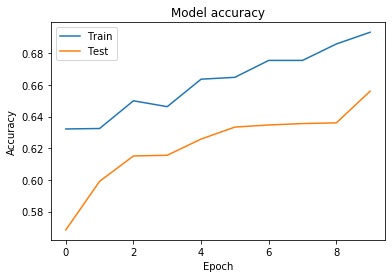

In [99]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

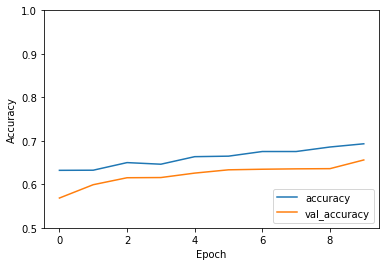

In [100]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)

3


In [285]:
#val_loss, val_acc=model.evaluate(xtest,ytest)
#print(val_loss,val_acc)
#score = model.evaluate(xtest, ytest, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

100/100 [==============================] - ETA:  - ETA:  - ETA:  - 0s 5ms/step
1.3728249645233155 0.27


In [108]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(64,64,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, (1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(5, activation='linear'))

# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam')
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Fit the model
#model.fit(xtrain, ytrain, epochs=5, batch_size=8)
model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest))
#history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

Train on 675 samples, validate on 225 samples
Epoch 1/50
675/675 [==============================] - ETA: 38s - loss: 5.0839 - acc: 0.28 - ETA: 25s - loss: 3.7536 - acc: 0.31 - ETA: 22s - loss: 3.3320 - acc: 0.33 - ETA: 19s - loss: 2.8843 - acc: 0.33 - ETA: 17s - loss: 3.5287 - acc: 0.33 - ETA: 15s - loss: 4.8787 - acc: 0.32 - ETA: 14s - loss: 5.9886 - acc: 0.31 - ETA: 13s - loss: 6.8151 - acc: 0.32 - ETA: 11s - loss: 7.3454 - acc: 0.32 - ETA: 10s - loss: 7.6686 - acc: 0.32 - ETA: 9s - loss: 8.0246 - acc: 0.3153 - ETA: 8s - loss: 8.4054 - acc: 0.304 - ETA: 7s - loss: 8.8104 - acc: 0.310 - ETA: 6s - loss: 9.1978 - acc: 0.312 - ETA: 5s - loss: 9.4391 - acc: 0.331 - ETA: 4s - loss: 9.5217 - acc: 0.328 - ETA: 3s - loss: 9.6172 - acc: 0.332 - ETA: 2s - loss: 9.4756 - acc: 0.328 - ETA: 1s - loss: 9.3486 - acc: 0.328 - ETA: 0s - loss: 9.1333 - acc: 0.328 - ETA: 0s - loss: 9.2023 - acc: 0.333 - 21s 31ms/step - loss: 9.1855 - acc: 0.3333 - val_loss: 11.0319 - val_acc: 0.3467
Epoch 2/50
675/675 [

675/675 [==============================] - ETA: 18s - loss: 7.5554 - acc: 0.50 - ETA: 16s - loss: 6.5480 - acc: 0.32 - ETA: 15s - loss: 7.2196 - acc: 0.31 - ETA: 15s - loss: 7.4294 - acc: 0.34 - ETA: 14s - loss: 7.3539 - acc: 0.34 - ETA: 13s - loss: 7.5554 - acc: 0.34 - ETA: 12s - loss: 7.9151 - acc: 0.33 - ETA: 12s - loss: 8.2479 - acc: 0.32 - ETA: 10s - loss: 8.2269 - acc: 0.34 - ETA: 10s - loss: 8.2605 - acc: 0.34 - ETA: 9s - loss: 8.1048 - acc: 0.3494 - ETA: 8s - loss: 8.1850 - acc: 0.354 - ETA: 7s - loss: 8.1365 - acc: 0.358 - ETA: 6s - loss: 8.2389 - acc: 0.348 - ETA: 5s - loss: 8.3277 - acc: 0.345 - ETA: 4s - loss: 8.3424 - acc: 0.347 - ETA: 3s - loss: 8.2369 - acc: 0.352 - ETA: 2s - loss: 8.1711 - acc: 0.350 - ETA: 1s - loss: 8.0061 - acc: 0.350 - ETA: 1s - loss: 8.0339 - acc: 0.345 - ETA: 0s - loss: 8.0831 - acc: 0.340 - 22s 33ms/step - loss: 8.0949 - acc: 0.3407 - val_loss: 5.0862 - val_acc: 0.3467
Epoch 18/50
675/675 [==============================] - ETA: 20s - loss: 7.0517

675/675 [==============================] - ETA: 15s - loss: 9.0664 - acc: 0.31 - ETA: 14s - loss: 7.8072 - acc: 0.34 - ETA: 13s - loss: 8.2269 - acc: 0.33 - ETA: 13s - loss: 7.8072 - acc: 0.33 - ETA: 12s - loss: 7.8576 - acc: 0.36 - ETA: 11s - loss: 7.5554 - acc: 0.36 - ETA: 10s - loss: 7.6993 - acc: 0.38 - ETA: 10s - loss: 7.8702 - acc: 0.38 - ETA: 9s - loss: 7.8352 - acc: 0.3681 - ETA: 8s - loss: 7.8576 - acc: 0.359 - ETA: 7s - loss: 7.9675 - acc: 0.363 - ETA: 7s - loss: 7.8072 - acc: 0.349 - ETA: 6s - loss: 7.7878 - acc: 0.355 - ETA: 5s - loss: 7.7352 - acc: 0.361 - ETA: 4s - loss: 7.7568 - acc: 0.372 - ETA: 3s - loss: 7.5554 - acc: 0.361 - ETA: 3s - loss: 7.5850 - acc: 0.358 - ETA: 2s - loss: 7.5554 - acc: 0.352 - ETA: 1s - loss: 7.4758 - acc: 0.350 - ETA: 0s - loss: 7.3791 - acc: 0.342 - ETA: 0s - loss: 7.4354 - acc: 0.343 - 18s 26ms/step - loss: 7.4024 - acc: 0.3452 - val_loss: 5.0862 - val_acc: 0.3467
Epoch 34/50
675/675 [==============================] - ETA: 17s - loss: 9.0664

675/675 [==============================] - ETA: 14s - loss: 8.0590 - acc: 0.21 - ETA: 13s - loss: 7.0517 - acc: 0.29 - ETA: 12s - loss: 6.8838 - acc: 0.31 - ETA: 12s - loss: 6.2961 - acc: 0.32 - ETA: 11s - loss: 6.3465 - acc: 0.33 - ETA: 10s - loss: 6.6319 - acc: 0.32 - ETA: 10s - loss: 6.7638 - acc: 0.32 - ETA: 9s - loss: 6.8628 - acc: 0.3125 - ETA: 8s - loss: 6.6039 - acc: 0.319 - ETA: 8s - loss: 6.7998 - acc: 0.318 - ETA: 7s - loss: 6.9601 - acc: 0.329 - ETA: 6s - loss: 6.9677 - acc: 0.335 - ETA: 5s - loss: 6.9742 - acc: 0.334 - ETA: 5s - loss: 7.1236 - acc: 0.330 - ETA: 4s - loss: 7.1188 - acc: 0.325 - ETA: 3s - loss: 7.0831 - acc: 0.326 - ETA: 3s - loss: 7.1406 - acc: 0.325 - ETA: 2s - loss: 7.1076 - acc: 0.322 - ETA: 1s - loss: 7.0517 - acc: 0.327 - ETA: 0s - loss: 7.1776 - acc: 0.328 - ETA: 0s - loss: 7.0996 - acc: 0.324 - 17s 25ms/step - loss: 7.0920 - acc: 0.3244 - val_loss: 5.0862 - val_acc: 0.3378
Epoch 50/50
675/675 [==============================] - ETA: 14s - loss: 4.5332